In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from numpy import abs, sqrt, sin, cos, arccos, arcsin, tan, arctan, sinh, cosh, tanh, arcsinh, arctanh, round, floor, \
    ceil, exp, log, pi

In [12]:
class Graph:
    def __init__(self, function, left_point, right_point):
        self.function = function
        self.left_point = left_point
        self.right_point = right_point
        self.string_to_float()
        self.rectangle_width = 0
        self.down_area = []
        self.function_values = []
        self.upper_area = []
        self.change_to_program_code()

    def __str__(self):
        return f'Your function: {self.function}'

    def new_condition(self):
        self.function_values = []

    def change_to_program_code(self, variable=None):
        if 'np.e' not in self.function:
            self.function = self.function.replace('e', 'np.e')
        if '^' in self.function:
            self.function = self.function.replace('^', ' ** ')
        if variable:
            variable = variable.replace('^', ' ** ')
            return variable

    def get_function_value(self, point_coordinate):
        x = point_coordinate
        try:
            new_value = eval(self.function)
            self.function_values.append([x, new_value])
            return new_value
        except ZeroDivisionError or RuntimeWarning:
            return

    def save_plot(self, x, y, filename,action='Save'):
        plt.plot(x, y)
        plt.axhline(0, color='black', linewidth=1.2)
        plt.axvline(0, color='black', linewidth=1.2)
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        if action == 'Save':
            plt.savefig(f'{filename}.jpg')
            plt.close()
        else:
            plt.show()

    def get_length(self, x):
        x = x
        try:
            return eval(self.function)
        except ZeroDivisionError or RuntimeWarning:
            return

    def draw_plot(self):
        self.new_condition()
        step = 0.001
        left, right = self.left_point, self.right_point
        while left <= right:
            left += step
            self.get_function_value(left)
        x, y = list(map(lambda k: k[0], self.function_values)), list(map(lambda k: k[1], self.function_values))
        self.save_plot(x, y, filename='Function',action='Show')

    def compute_down_area(self, height, width):
        self.down_area.append(height * width)

    def compute_up_area(self, height, width):
        self.upper_area.append(height * width)

    def draw_rectangles_plot_down(self, rectangle_count):
        self.new_condition()
        self.rectangle_width = np.divide((self.right_point - self.left_point), rectangle_count)
        k_rectangles = 0
        rectangles_coordinates = []
        left_point = self.left_point
        while k_rectangles <= rectangle_count:
            if k_rectangles != rectangles_count:
                width = self.rectangle_width
                try:
                    if self.get_length(left_point) < 0:
                        rectangle_height = max(self.get_length(x=left_point + width),
                                               self.get_length(x=left_point))
                    else:
                        rectangle_height = min(self.get_length(x=left_point + width),
                                               self.get_length(x=left_point))
                    rectangles_coordinates.append(
                        patches.Rectangle((left_point, 0), width, rectangle_height, edgecolor='blue',
                                          facecolor='none',
                                          linewidth=0.5))
                    self.compute_down_area(rectangle_height, width)
                except ZeroDivisionError or RuntimeWarning:
                    pass
            self.get_function_value(left_point)
            left_point += self.rectangle_width
            k_rectangles += 1
        x, y = list(map(lambda k: k[0], self.function_values)), list(map(lambda k: k[1], self.function_values))
        fig, ax = plt.subplots()
        for i in rectangles_coordinates:
            ax.add_patch(i)
        self.save_plot(x, y, filename='Function_down_rectangles',action='Show')

    def draw_rectangles_plot_up(self, rectangle_count):
        self.new_condition()
        self.rectangle_width = np.divide((self.right_point - self.left_point), rectangle_count)
        k_rectangles = 0
        rectangles_coordinates = []
        left_point = self.left_point
        while k_rectangles <= rectangle_count:
            if k_rectangles != rectangles_count:
                width = self.rectangle_width
                try:
                    if self.get_length(left_point) < 0:
                        rectangle_height = min(self.get_length(x=left_point + width),
                                               self.get_length(x=left_point))
                    else:
                        rectangle_height = max(self.get_length(x=left_point + width),
                                               self.get_length(x=left_point))
                    rectangles_coordinates.append(
                        patches.Rectangle((left_point, 0), width, rectangle_height, edgecolor='blue',
                                          facecolor='none',
                                          linewidth=0.5))
                    self.compute_up_area(rectangle_height, width)
                except ZeroDivisionError or RuntimeWarning:
                    pass
            self.get_function_value(left_point)
            left_point += self.rectangle_width
            k_rectangles += 1
        x, y = list(map(lambda k: k[0], self.function_values)), list(map(lambda k: k[1], self.function_values))
        fig, ax = plt.subplots()
        for i in rectangles_coordinates:
            ax.add_patch(i)
        self.save_plot(x, y, filename='Function_up_rectangles',action='Show')

    def string_to_float(self):
        self.left_point = self.change_to_program_code(variable=self.left_point)
        self.right_point = self.change_to_program_code(variable=self.right_point)
        if 'pi' in self.right_point:
            new_var = self.right_point.replace('pi', 'np.pi')
            self.right_point = eval(new_var, {"np": np})
        elif 'e' in self.right_point:
            new_var = self.right_point.replace('e', 'np.e')
            self.right_point = eval(new_var, {"np": np})
        if 'pi' in self.left_point:
            new_var = self.left_point.replace('pi', 'np.pi')
            self.left_point = eval(new_var, {"np": np})
        elif 'e' in self.left_point:
            new_var = self.left_point.replace('e', 'np.e')
            self.left_point = eval(new_var, {"np": np})
        self.right_point = float(self.right_point)
        self.left_point = float(self.left_point)

Your function: sin(x)


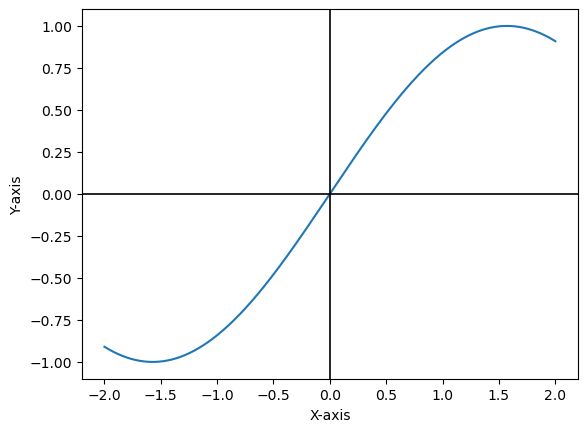

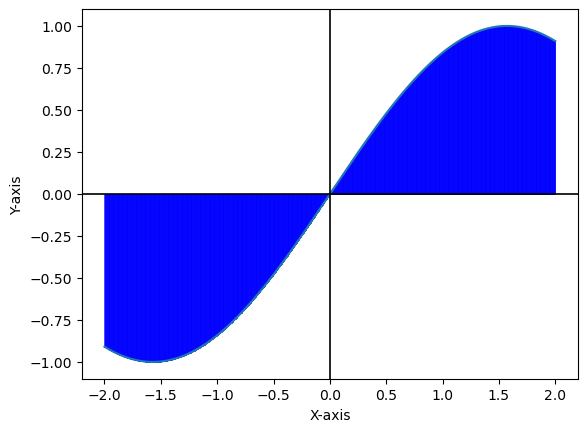

Sum below the graph : 2.9182385674619837e-15


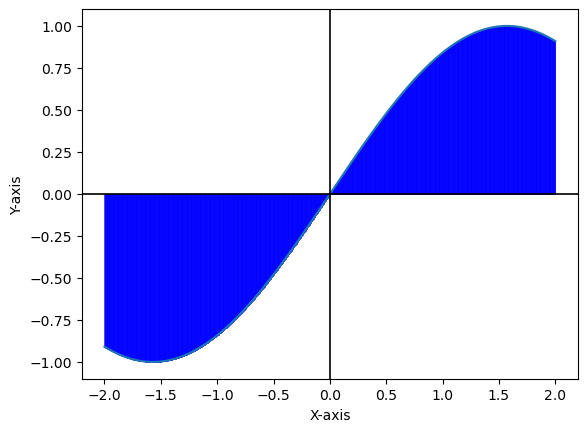

Sum upper the graph : 2.835405521484091e-15


In [13]:
# a = input('Enter your function : ')
# function name
a = 'sin(x)'
# l = str(input("Left point of Domain : "))
# left domain point 
l = '-2'
# r = str(input("Right point of Domain : "))
# right point of domain 
r = '2'
graph = Graph(a, l, r)
print(graph)
graph.draw_plot()
# rectangles_count = int(input('Enter the number of rectangles : '))
# rectangles num 
rectangles_count = 1000
graph.draw_rectangles_plot_down(rectangles_count)
print(f'Sum below the graph : {sum(graph.down_area)}')
graph.draw_rectangles_plot_up(rectangles_count)
print(f'Sum upper the graph : {sum(graph.upper_area)}')

Your function: np.e ** sin(x)


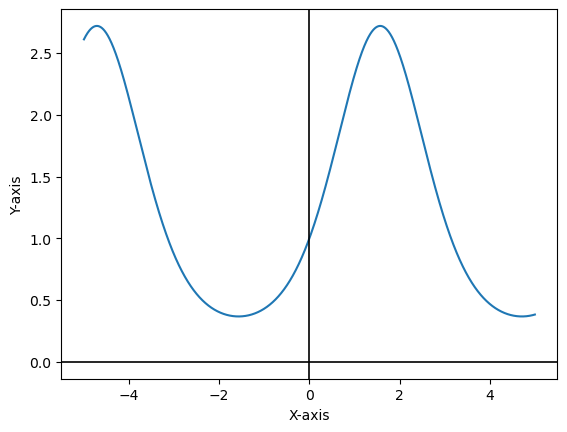

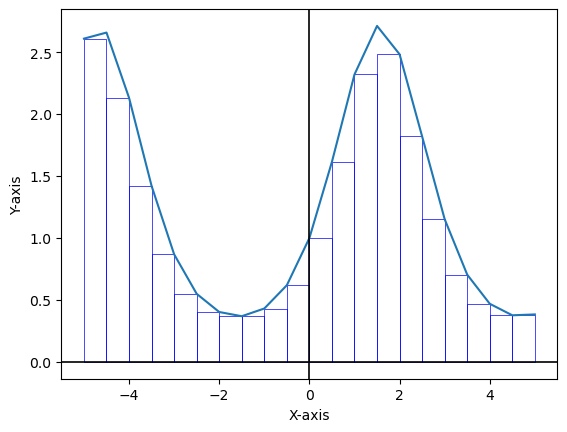

Sum below the graph : 11.041679905007562


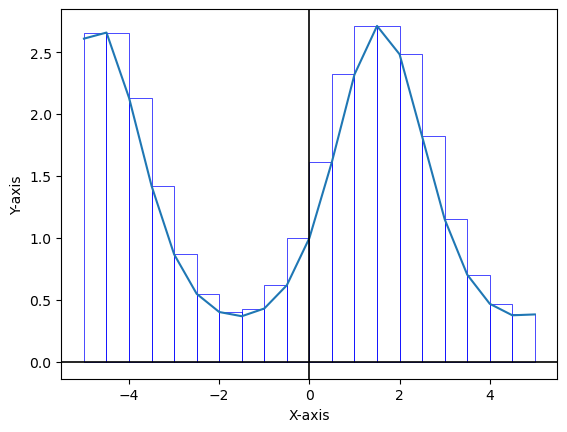

Sum upper the graph : 14.553211273061194


In [14]:
# a = input('Enter your function : ')
# function name
a = 'e^sin(x)'
# l = str(input("Left point of Domain : "))
# left domain point 
l = '-5'
# r = str(input("Right point of Domain : "))
# right point of domain 
r = '5'
graph = Graph(a, l, r)
print(graph)
graph.draw_plot()
# rectangles_count = int(input('Enter the number of rectangles : '))
# rectangles num 
rectangles_count = 20
graph.draw_rectangles_plot_down(rectangles_count)
print(f'Sum below the graph : {sum(graph.down_area)}')
graph.draw_rectangles_plot_up(rectangles_count)
print(f'Sum upper the graph : {sum(graph.upper_area)}')

Your function: arctan(x)


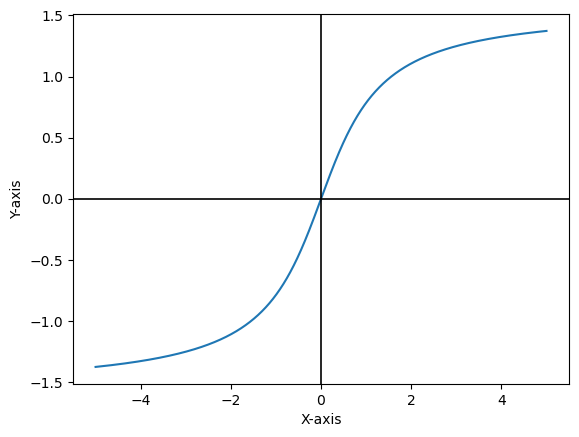

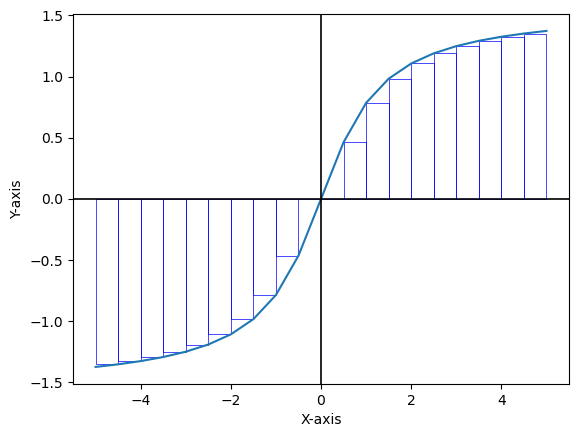

Sum below the graph : 9.992007221626409e-16


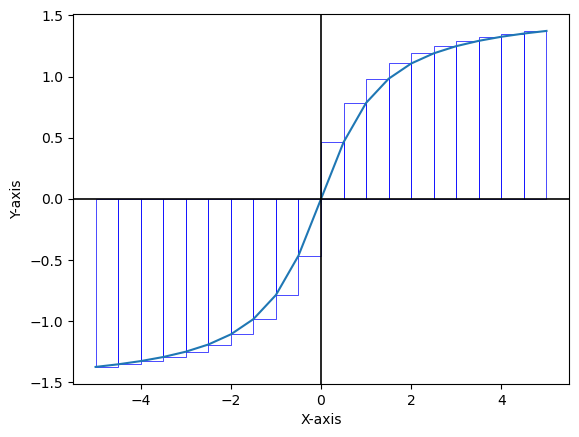

Sum upper the graph : 3.3306690738754696e-16


In [15]:
# a = input('Enter your function : ')
# function name
a = 'arctan(x)'
# l = str(input("Left point of Domain : "))
# left domain point 
l = '-5'
# r = str(input("Right point of Domain : "))
# right point of domain 
r = '5'
graph = Graph(a, l, r)
print(graph)
graph.draw_plot()
# rectangles_count = int(input('Enter the number of rectangles : '))
# rectangles num 
rectangles_count = 20
graph.draw_rectangles_plot_down(rectangles_count)
print(f'Sum below the graph : {sum(graph.down_area)}')
graph.draw_rectangles_plot_up(rectangles_count)
print(f'Sum upper the graph : {sum(graph.upper_area)}')

Your function: x ** 3 - x ** 2 +2*x-3


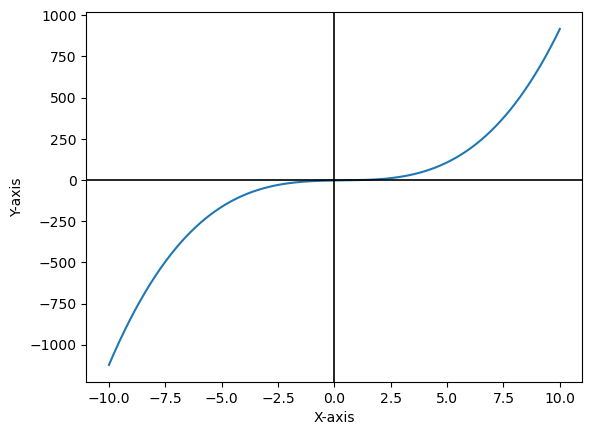

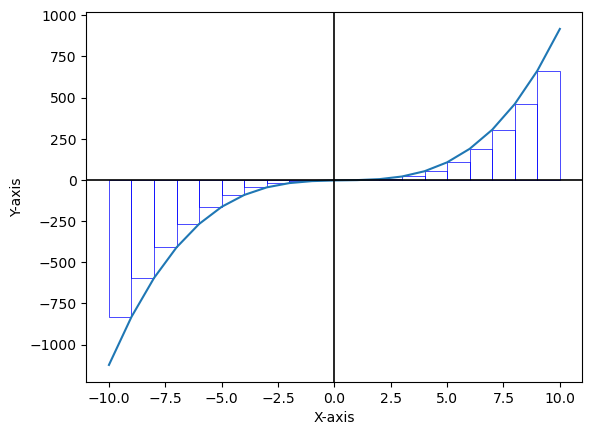

Sum below the graph : -622.0


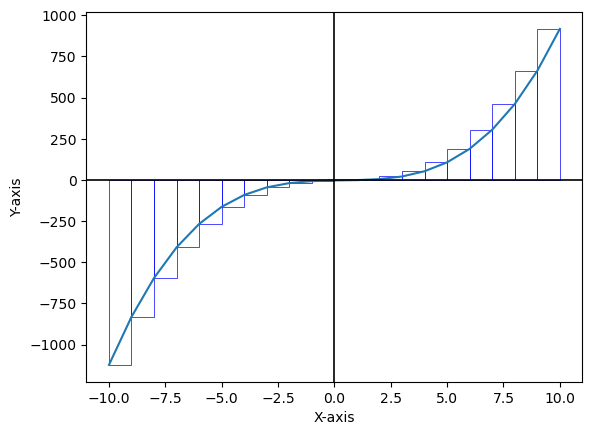

Sum upper the graph : -838.0


In [17]:
# a = input('Enter your function : ')
# function name
a = 'x^3 - x^2 +2*x-3'
# l = str(input("Left point of Domain : "))
# left domain point 
l = '-10'
# r = str(input("Right point of Domain : "))
# right point of domain 
r = '10'
graph = Graph(a, l, r)
print(graph)
graph.draw_plot()
# rectangles_count = int(input('Enter the number of rectangles : '))
# rectangles num 
rectangles_count = 20
graph.draw_rectangles_plot_down(rectangles_count)
print(f'Sum below the graph : {sum(graph.down_area)}')
graph.draw_rectangles_plot_up(rectangles_count)
print(f'Sum upper the graph : {sum(graph.upper_area)}')